# 3. Exploratory Data Analysis

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

## 1. Load Cleaned Dataset

In [40]:
fakenews_df = pd.read_csv("../data/processed/cleaned_fake_news_dataset.csv")

In [41]:
# Set Seaborn style
sns.set(style="whitegrid")

## 2. Label Distribution

C:\Users\arpit\AppData\Local\Temp\ipykernel_13916\3787362017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fakenews_df, x='label', palette='Set2')


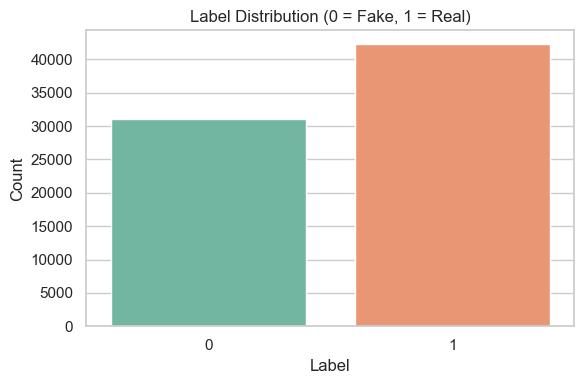

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=fakenews_df, x='label', palette='Set2')
plt.title("Label Distribution (0 = Fake, 1 = Real)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 2. Class imbalance percentage

In [43]:
label_counts = fakenews_df['label'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(label_counts.round(2))

Class Distribution (%):
label
1    57.63
0    42.37
Name: proportion, dtype: float64


## 3. Class Balancing

### Since the label distribution is unblanced ,,, It would be biased against fake news. So there is need to balance the dataset. We do this by undersampling the majority class i.e. 1(Real) Label. As We don't want to introduce synthetic data for Minority class i.e. o(Fake) Label

### Undersampling the majority class :

In [44]:
from sklearn.utils import resample

### A. Separate classes

In [45]:
df_majority = fakenews_df[fakenews_df.label == 1]
df_minority = fakenews_df[fakenews_df.label == 0]

### B. Downsample majority

In [46]:
df_majority_downsampled = resample(df_majority, 
                                   replace=False, 
                                   n_samples=len(df_minority), 
                                   random_state=42)

### C. Combine

In [47]:
fakenews_balanced_df = pd.concat([df_minority, df_majority_downsampled])

C:\Users\arpit\AppData\Local\Temp\ipykernel_13916\1753361110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fakenews_balanced_df, x='label', palette='Set2')


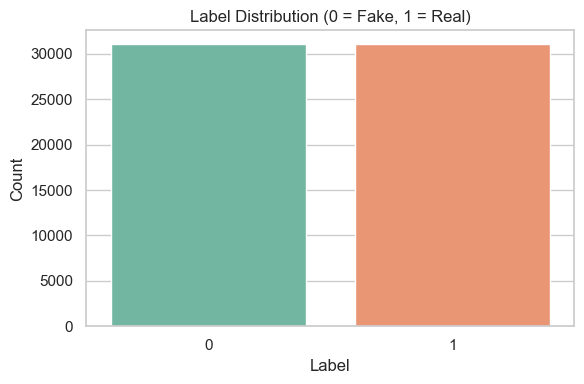

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(data=fakenews_balanced_df, x='label', palette='Set2')
plt.title("Label Distribution (0 = Fake, 1 = Real)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 4. Word cloud for each class

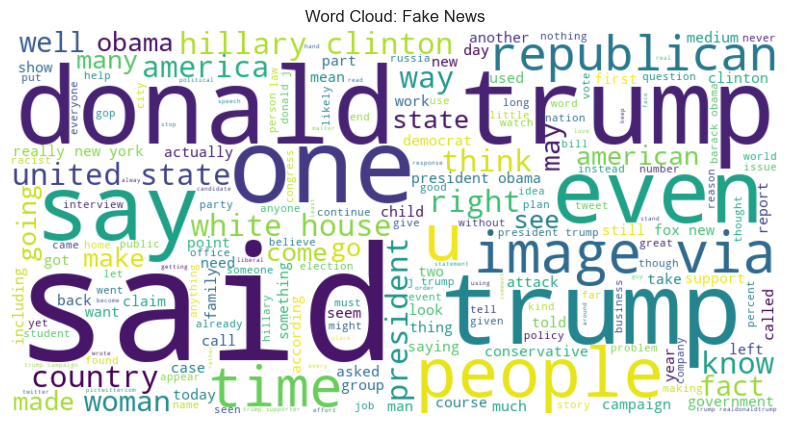

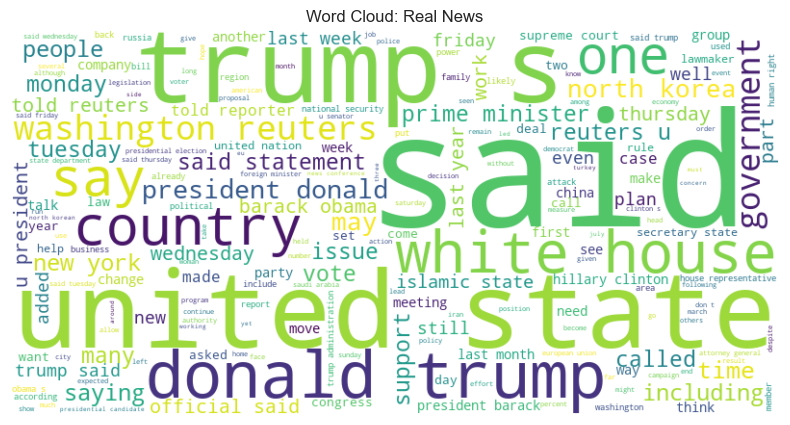

In [49]:
for label_value, label_name in zip([0, 1], ['Fake News', 'Real News']):
    text = ' '.join(fakenews_balanced_df[fakenews_balanced_df['label'] == label_value]['processed_text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud: {label_name}')
    plt.show()

## 5. Most common words (across dataset)

In [50]:
fakenews_balanced_df = fakenews_balanced_df.dropna(subset=['processed_text'])

In [51]:
all_words = ' '.join(fakenews_balanced_df['processed_text']).split()
common_words = Counter(all_words).most_common(20)
words, counts = zip(*common_words)

C:\Users\arpit\AppData\Local\Temp\ipykernel_13916\3682639558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


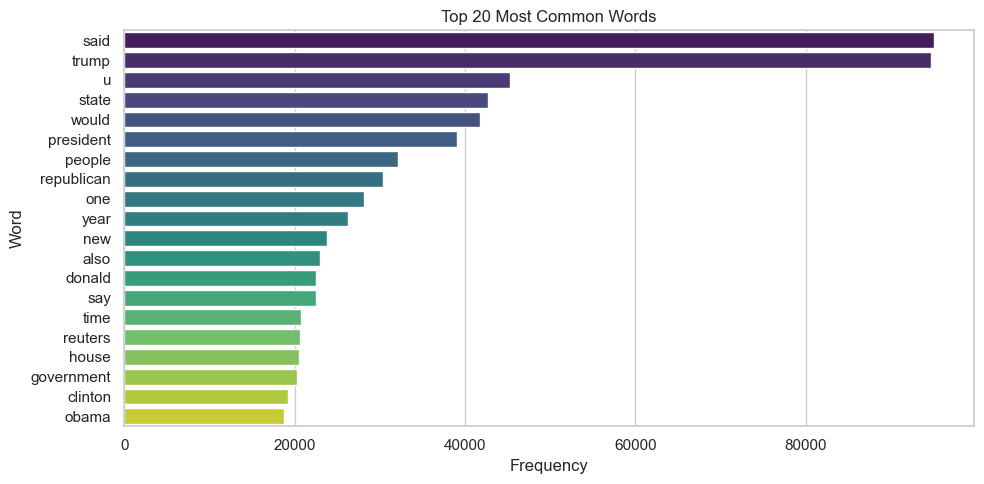

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

## 6. Sentiment analysis with VADER

In [53]:
sia = SentimentIntensityAnalyzer()
fakenews_balanced_df['sentiment'] = fakenews_balanced_df['processed_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

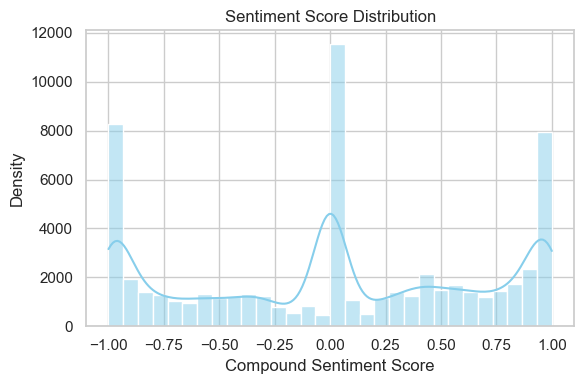

In [54]:
plt.figure(figsize=(6, 4))
sns.histplot(data=fakenews_balanced_df, x='sentiment', bins=30, kde=True, color='skyblue')
plt.title("Sentiment Score Distribution")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

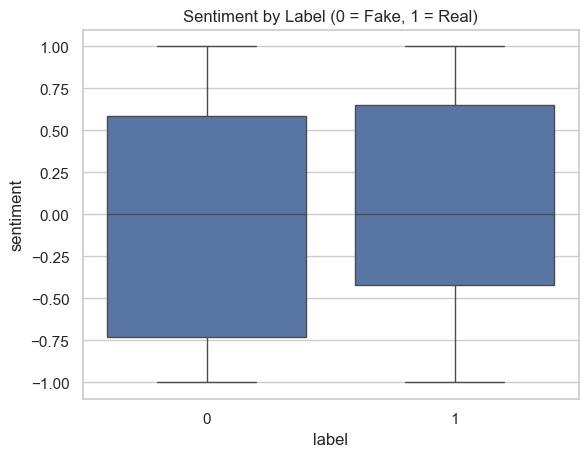

In [55]:
sns.boxplot(x='label', y='sentiment', data=fakenews_balanced_df)
plt.title("Sentiment by Label (0 = Fake, 1 = Real)")
plt.show()

In [57]:
import os
output_dir = "../data/processed"
os.makedirs(output_dir, exist_ok=True)

# Save the file
output_path = os.path.join(output_dir, "balanced_fake_news_dataset.csv")
fakenews_balanced_df.to_csv(output_path, index=False)
print(f"Balanced dataset saved to: {output_path}")

Balanced dataset saved to: ../data/processed\balanced_fake_news_dataset.csv
